In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# Loading the data files

data = pd.read_csv("spam-ham.csv", encoding = "latin-1")
data = data[['v1', 'v2']]
data = data.rename(columns = {'v1': 'label', 'v2': 'text'})
data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
# Performing data cleaning
'''
performing case normalisation (like converting any uppercase to lowercase), removing stop words and stemming using pre-built tools
'''

# from nltk import stem
# from nltk.corpus import stopwords
# stemmer  = stem.SnowballStemmer('english')
# stopwords = set(stopwords.words('english'))

# def review_messages(msg):
#     msg = msg.lower()
#     msg = [word for word in msg.split() if word not in stopwords]
#     msg = "".join([stemmer.stem(word) for word in msg])
#     return msg

# data['text'] = data['text'].apply(review_messages)
# data

'\nperforming case normalisation (like converting any uppercase to lowercase), removing stop words and stemming using pre-built tools\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None 


11144 


(5572, 2) 


ham     4825
spam     747
Name: label, dtype: int64 


AxesSubplot(0.125,0.11;0.775x0.77) 


['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name'] 

 ['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


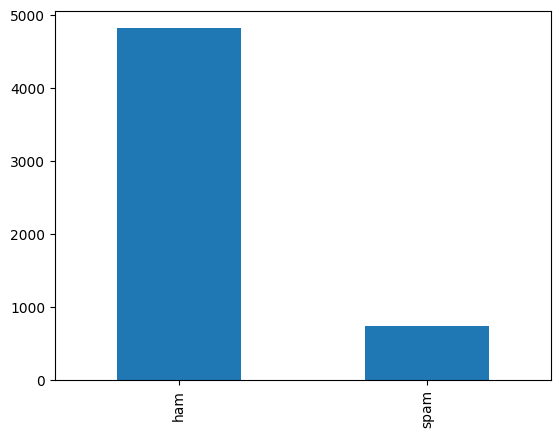

In [4]:
# Performing a bit of data analysis by visualizing the content

print(data.info(), "\n\n")

print(data.size, "\n\n")

print(data.shape, "\n\n")

print(data.label.value_counts(), "\n\n")

print(data.label.value_counts().plot(kind='bar'), "\n\n")

x, y = data.iloc[:, 1].values, data.iloc[:, 0].values
print(x, "\n\n", y)

In [5]:
# Vectorizing the text
'''
Here, TF-IDF vectorizer is used, (aka Term Frequency- Inverse Term Document Frequency) which takes into account the importance of each term to the document
'''

from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, random_state=0)

from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
x_train_v, x_test_v = vect.fit_transform(x_train), vect.transform(x_test)

from sklearn.svm import SVC
model = SVC()
model.fit(x_train_v, y_train)
y_pred = model.predict(x_test_v)
print(y_pred, "\n")
print(y_test, "\n\n")

from sklearn.metrics import accuracy_score
print("accuracy score:", accuracy_score(y_pred, y_test)*100, "%")

['ham' 'ham' 'ham' ... 'ham' 'ham' 'spam'] 

['ham' 'ham' 'ham' ... 'ham' 'ham' 'spam'] 


accuracy score: 97.84637473079684 %


In [6]:
''' 
Building a pipeline model over the Tf-IDF vectorizer
'''

from sklearn.pipeline import make_pipeline as mp
text_model = mp(TfidfVectorizer(), SVC())
text_model.fit(x_train, y_train)
y_pred_mp = text_model.predict(x_test)
print(y_pred_mp, "\n")
print(y_test, "\n\n")

print("accuracy score:", accuracy_score(y_pred_mp, y_test)*100, "%")

['ham' 'ham' 'ham' ... 'ham' 'ham' 'spam'] 

['ham' 'ham' 'ham' ... 'ham' 'ham' 'spam'] 


accuracy score: 97.84637473079684 %


In [7]:
# Seriealizing the object text_model

import joblib
joblib.dump(text_model, 'spam-ham')

['spam-ham']

In [8]:
%%writefile spam-ham-app.py
import streamlit as sl
import joblib
model = joblib.load('spam-ham')
sl.title('SPAM-HAM CLASSIFIER')
ip = sl.text_input('ENTER THE MESSAGE')
op = model.predict([ip])
if sl.button('PREDICT'):
    sl.title(op[0])

Overwriting spam-ham-app.py


In [9]:
# Run the interactive app in web browser 

!streamlit run spam-ham-app.py & npx localtunnel --port 8501

^C
